## **Difference in Difference**

### Background
The difference-in-difference approach, or DiD, is a quasi-experimental method to measure the changes of the outcome over time between the treatment and control groups. Over the past decades, DiD has been widely researched in economics and statistics. 

Consider an example in marketing where decision makers are interested in evaluating the effect of an advertising intervention on incremental overall product sales. Traditional DiD method supposes that the data is split into two groups, treatment group and control group, where only the consumers in the treatment group are potentially able to get intervention. 

In the pre-treatment period, all consumers are not exposed to the intervention. While in the post-treatment period, only the consumers in the treatment group are intervened.


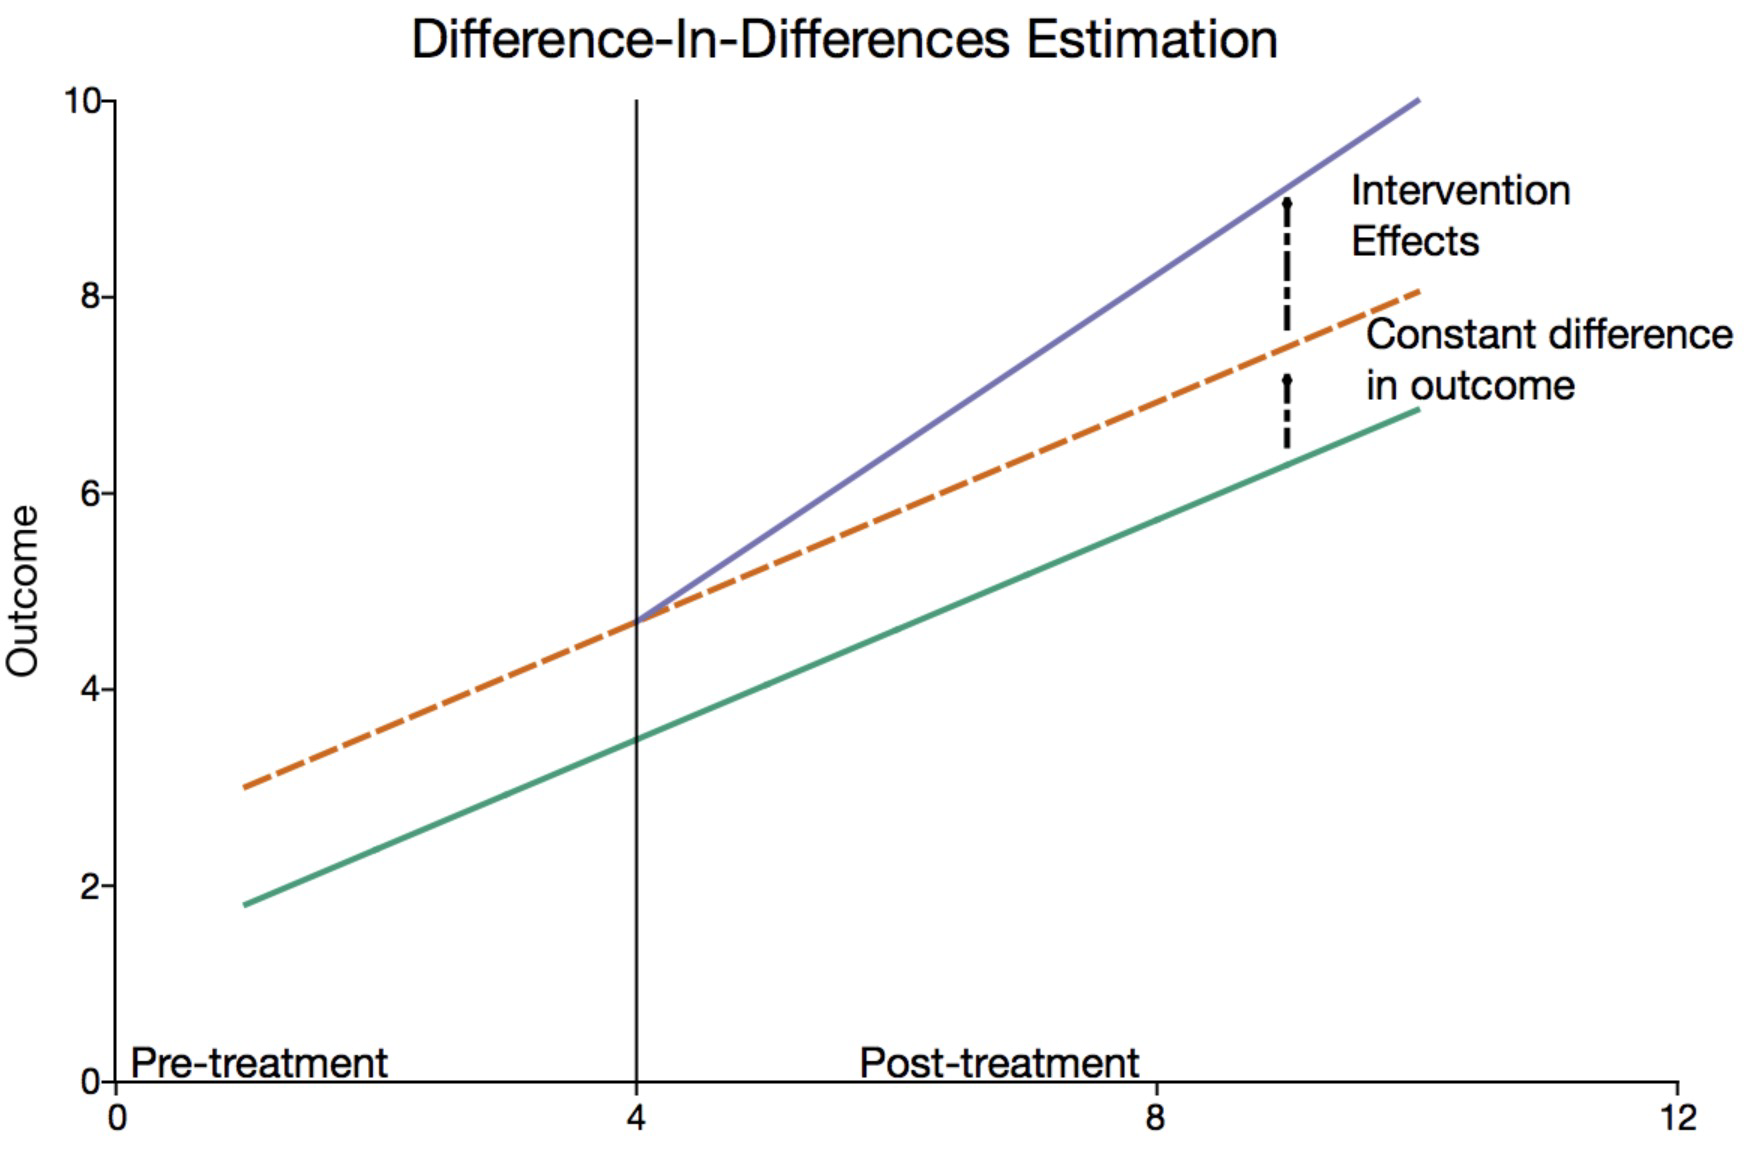

In [1]:
from IPython import display
display.Image("CEL-DiD.png")

In the above figure, the green real line denotes the observed outcome in the control group, and the purple real line (along with the orange dashed line in the pre-treatment period) denotes the observed outcome in the treatment group. The essense of DiD method is based on the `parallel trend assumption`: i.e. if the data in treatment group remain untreated all the time, the outcome trend (shown by the orange line above) will be the same as the control group.

The purpose of DiD is to estimate the treatment effect of an intervention over time.

### Definitions

In the context of panel data, we define $Y_t(d)$ as the potential outcome one would observe under treatment $D=d$ at stage $T=t$.


Our problem of interest is to identify and estimate the average treatment effect of intervention $D$ on the treated, which is defined as
\begin{equation}
ATT_t = \mathbb{E}[Y_t(1)-Y_t(0)|D=1].
\end{equation}
The heterogeneous treatment effect on the treated can be similarly defined by
\begin{equation}
\tau_t(s) = \mathbb{E}[Y_t(1)-Y_t(0)|D=1,S=s],
\end{equation}
where we also condition on the covariates $S=s$ to denote the individualized treatment effect.

For the units in treated group, we can estimate the potential outcome $\mathbb{E}[Y_t(1)|D=1]$ from observational data after they received treatment (under SUTVA assumption that we are going to introduce very shortly). The tricky part of estimating ATT lies in the estimation of the counterfactual, $\mathbb{E}[Y_t(0)|D=1]$. That is, we need to answer the question ``What's the potential outcome for a treated unit if it was untreated?"

The key idea of diff-in-diff approach is that we can utilize the information in the control unit group, i.e. finding similar units who have never been treated before and after treatment time to construct an estimator for $\mathbb{E}[Y_t(0)|D=1]$. To achieve this, we need some further assumptions aside from SUTVA to guarantee that the similarity between treated and control groups can be ``transfered".


### Assumptions 

* `SUTVA`: $Y_t=dY_t(1) + (1-d) Y_t(0)$, $\forall d\in \{0,1\}$
* `exogeneity`: the covariates $S$ won't be affected by the treatment assigned to the subject, i.e. $S(d)=S$ for any $d\in\{0,1\}$.
* `NEPT`: the treatment has No Effect on the Pre-Treated population (NEPT), i.e. $\tau_0(s)=0,$ $\forall s\in\mathcal{S}$.
* `parallel trend`: the outcomes in treatment and control groups follow the same trend. That is,
\begin{equation}
\begin{aligned}
\mathbb{E}[Y_1(0)|S_i=s,D=1]- \mathbb{E}[Y_1(0)|S_i=s,D=0]=\mathbb{E}[Y_0(0)|S_i=s,D=1]- \mathbb{E}[Y_0(0)|S_i=s,D=0]
\end{aligned}
\end{equation}


### Estimation
The heterogeneous treatment effect on the treated group can be estimated by
\begin{equation}
\tau_1(s) = \mathbb{E}[Y_1|S=s,D=1]-\mathbb{E}[Y_1|S=s,D=0]-\mathbb{E}[Y_0|S=s,D=1]+\mathbb{E}[Y_0|S=s,D=0]
\end{equation}

The name ``difference-in-difference" comes from the expression above, where we are taking the difference of the post-treatment effect and pre-treatment effect between treated group and control group.

### Demo

In this section, we estimate the individualized treatment effect over time through a simple dataset. This data is available in [Card and Krueger (1994)](https://davidcard.berkeley.edu/papers/njmin-aer.pdf), which aims to investigate the effect of raising the in-state minimum wage on employment. 


In [2]:
# this is the demo for panel data
# https://www.kaggle.com/code/harrywang/difference-in-differences-in-python/input
# https://www.kaggle.com/datasets/parulpandey/covid19-clinical-trials-dataset
# https://www.kaggle.com/code/sandhyakrishnan02/econometric-analysis-of-panel-data-using-r/input
# employment: https://www.kaggle.com/datasets/harrywang/propensity-score-matching?resource=downloa


The dataset contains 384 rows in total, where each row denotes a specific fast-food restaurant in New Jersey or Pennsylvania. On April 1, 1992, New Jersey raised the state minimum wage from $\$$4.25 to $\$$5.05 while the minimum wage in Pennsylvania stays the same at $\$$4.25. For each company, we record the total number of employees in Febuarary (i.e. before executing new policy) and the number of employees in November (i.e. after executing the new policy).

In [3]:
# load the data
import numpy as np
import pandas as pd
import os
os.chdir('/Users/alinaxu/Documents/CDM/CausalDM')
data_employment = pd.read_csv('./causaldm/data/employment.csv')
data_employment.head()

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: '/Users/alinaxu/Documents/CDM/CausalDM'

In [20]:
n_PA = len(data_employment[data_employment.state == 0])
n_NJ = len(data_employment[data_employment.state == 1])
n_PA, n_NJ

(75, 309)

In [24]:
# calculate the estimated 
Y_PA_feb = round(data_employment[data_employment.state == 0].total_emp_feb.sum()/n_PA,2)
Y_PA_nov = round(data_employment[data_employment.state == 0].total_emp_nov.sum()/n_PA,2)
Y_NJ_feb = round(data_employment[data_employment.state == 1].total_emp_feb.sum()/n_NJ,2)
Y_NJ_nov = round(data_employment[data_employment.state == 1].total_emp_nov.sum()/n_NJ,2)
Y_PA_feb, Y_PA_nov, Y_NJ_feb, Y_NJ_nov

(23.38, 21.1, 20.43, 20.9)

Definition of three columns:
*  ``State": PA(0) and NJ(1)
*  ``total_emp_feb": Total number of employees in Febuarary, 1992.
*  ``total_emp_nov": Total number of employees in November, 1992.

In this example, we define the treated group as the restaurants in NJ, and control group as the restaurants in PA. 
First, if we look at the control group (i.e. restaurants in PA), the average number of employees is 23.38 in Feb and changes to 21.1 in Nov, yielding 
\begin{equation}
    \hat{\mathbb{E}}[Y_1|D=0]-\hat{\mathbb{E}}[Y_0|D=0] = 21.1 - 23.38 = -2.28.
\end{equation}
Similarly, for treated group (i.e. restaurants in NJ), the average number of employees is 20.43 in Feb and changes to 20.9 in Nov, yielding 
\begin{equation}
    \hat{\mathbb{E}}[Y_1|D=0]-\hat{\mathbb{E}}[Y_0|D=0] = 20.9 - 20.43 = 0.47.
\end{equation}
According to the diff-in-diff expression, raising minimum wage in state has a positive impact on the employment. The average treatment effect is estimated by
\begin{equation}
\hat{\tau} = \hat{\mathbb{E}}[Y_1|D=1]-\hat{\mathbb{E}}[Y_1|D=0]-\hat{\mathbb{E}}[Y_0|D=1]+\hat{\mathbb{E}}[Y_0|D=0] =  0.47 - (-2.28) = 2.75.
\end{equation}

### Time-Varying ATT




Notations:
* $G_i\in\{0,1\}$: State indicator denoting whether unit $i$ is in the control or treated group;
* $T_i\in\{0,1\}$: Time of the observation. $T_i=0$ if $0\leq t\leq T_0$, and $T_i=1$ if $T_0+1\leq T_i\leq T_0+T_1$.


$G_i=1$ if unit $i$ comes from the treatment group, and $G_i=0$ if it is in control group. Similarly, define $T_i=1$ if the unit is in the post-treatment period, and $T_i=0$ if it's in pre-treatment period. The observed outcome is given by
\begin{equation}
    Y_i = (1-G_iT_i)\cdot Y_i(0) + G_iT_i\cdot Y_i(1),
\end{equation}
where $Y_i(a)$ denotes the potential outcome one would observe under action $A=a$.


The difference of average outcomes for the $m$ treated units after and before the treatment time point is given by
\begin{equation}
D_{\text{tr}} = \frac{1}{m} \sum_{i=1}^m\Big[\frac{1}{T_1}\sum_{t=T_0+1}^{T_0+T_1} Y_{i,t}-\frac{1}{T_0} \sum_{t=1}^{T_0} Y_{i,t}\Big]
\end{equation}


Similarly, the difference of average outcomes for the $n$ control units after and before the treatment time point is given by
\begin{equation}
D_{\text{co}} = \frac{1}{n} \sum_{i=m+1}^{m+n}\Big[\frac{1}{T_1}\sum_{t=T_0+1}^{T_0+T_1} Y_{i,t}-\frac{1}{T_0}\sum_{t=1}^{T_0} Y_{i,t}\Big]
\end{equation}

Under the parallel trend assumption, we are able to subtract the effect that's not caused by treatment intervention:
\begin{equation}
\hat{\Delta} = D_{\text{tr}} - D_{\text{co}} = \frac{1}{m} \sum_{i=1}^m\Big[\frac{1}{T_1}\sum_{t=T_0+1}^{T_0+T_1} Y_{i,t}-\frac{1}{T_0} \sum_{t=1}^{T_0} Y_{i,t}\Big] - \frac{1}{n} \sum_{i=m+1}^{m+n}\Big[\frac{1}{T_1}\sum_{t=T_0+1}^{T_0+T_1} Y_{i,t}-\frac{1}{T_0}\sum_{t=1}^{T_0} Y_{i,t}\Big].
\end{equation}

## References

1. Lechner, Michael. "The estimation of causal effects by difference-in-difference methods." Foundations and Trends® in Econometrics 4.3 (2011): 165-224.

2. Goodman-Bacon, Andrew. "Difference-in-differences with variation in treatment timing." Journal of Econometrics 225.2 (2021): 254-277.